In [61]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# Load the data from CSV file
df = pd.read_csv("bankruptcy.csv")
df.head()

corr_matrix = df.corr()
num_features = 10
corr_with_bankrupt = corr_matrix["Bankrupt?"].abs().sort_values(ascending=False)
top_corr_features = corr_with_bankrupt[1:num_features+1].index.tolist()
df[top_corr_features]


,Net Income to Total Assets,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,ROA(C) before interest and depreciation before interest,Net worth/Assets,Debt ratio %,Persistent EPS in the Last Four Seasons,Retained Earnings to Total Assets,Net profit before tax/Paid-in capital,Per Share Net profit before tax (Yuan ¥)
0,0.716845,0.424389,0.405750,0.370594,0.792424,0.207576,0.169141,0.903225,0.137757,0.138736
1,0.795297,0.538214,0.516730,0.464291,0.828824,0.171176,0.208944,0.931065,0.168962,0.169918
2,0.774670,0.499019,0.472295,0.426071,0.792484,0.207516,0.180581,0.909903,0.148036,0.142803
3,0.739555,0.451265,0.457733,0.399844,0.848535,0.151465,0.193722,0.906902,0.147561,0.148603
4,0.795016,0.538432,0.522298,0.465022,0.893491,0.106509,0.212537,0.913850,0.167461,0.168412
...,...,...,...,...,...,...,...,...,...,...
6814,0.799927,0.539468,0.543230,0.493687,0.875382,0.124618,0.216602,0.925611,0.171111,0.172102
6815,0.799748,0.538269,0.524172,0.475162,0.900747,0.099253,0.216697,0.932629,0.171805,0.172780
6816,0.797778,0.533744,0.520638,0.472725,0.961061,0.038939,0.210929,0.932000,0.172287,0.173232
6817,0.811808,0.559911,0.554045,0.506264,0.913021,0.086979,0.228326,0.939613,0.182498,0.185584


### implementing binomial logistic regression

In Logistic regression, instead of fitting a regression line, we fit an "S" shaped logistic function, which predicts two maximum values (0 or 1).
The curve from the logistic function indicates the likelihood of something such as whether the cells are cancerous or not, a mouse is obese or not based on its weight, etc.
Logistic Regression is a significant machine learning algorithm because it has the ability to provide probabilities and classify new data using continuous and discrete datasets.

The value of the logistic regression must be between 0 and 1, which cannot go beyond this limit, so it forms a curve like the "S" form. The S-form curve is called the Sigmoid function or the logistic function. In logistic regression, we use the concept of the threshold value, which defines the probability of either 0 or 1. Such as values above the threshold value tends to 1, and a value below the threshold values tends to 0.



In [62]:
df[top_corr_features].corr()

,Net Income to Total Assets,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,ROA(C) before interest and depreciation before interest,Net worth/Assets,Debt ratio %,Persistent EPS in the Last Four Seasons,Retained Earnings to Total Assets,Net profit before tax/Paid-in capital,Per Share Net profit before tax (Yuan ¥)
Net Income to Total Assets,1.000000,0.961552,0.912040,0.887670,0.281422,-0.281422,0.691152,0.794189,0.683623,0.671748
ROA(A) before interest and % after tax,0.961552,1.000000,0.955741,0.940124,0.259972,-0.259972,0.764828,0.718013,0.758234,0.752578
ROA(B) before interest and depreciation after tax,0.912040,0.955741,1.000000,0.986849,0.264734,-0.264734,0.764597,0.673738,0.726003,0.722940
ROA(C) before interest and depreciation before interest,0.887670,0.940124,0.986849,1.000000,0.261427,-0.261427,0.775006,0.650217,0.753339,0.750564
Net worth/Assets,0.281422,0.259972,0.264734,0.261427,1.000000,-1.000000,0.177429,0.235423,0.164110,0.158897
Debt ratio %,-0.281422,-0.259972,-0.264734,-0.261427,-1.000000,1.000000,-0.177429,-0.235423,-0.164110,-0.158897
Persistent EPS in the Last Four Seasons,0.691152,0.764828,0.764597,0.775006,0.177429,-0.177429,1.000000,0.492078,0.959461,0.955591
Retained Earnings to Total Assets,0.794189,0.718013,0.673738,0.650217,0.235423,-0.235423,0.492078,1.000000,0.483355,0.473736
Net profit before tax/Paid-in capital,0.683623,0.758234,0.726003,0.753339,0.164110,-0.164110,0.959461,0.483355,1.000000,0.962723
Per Share Net profit before tax (Yuan ¥),0.671748,0.752578,0.722940,0.750564,0.158897,-0.158897,0.955591,0.473736,0.962723,1.000000


Assumptions for Logistic Regression:
- The dependent variable must be categorical in nature.
- The independent variable should not have multi-collinearity.


To adhere to the second assumption, we chose the variable with the highest correlation, and the best next variable that has an absolute correlation of less than 0.5 so as to avoid multi-collinearity 

In [63]:
# Split the data into training and testing sets
# X = df.drop("Bankrupt?", axis=1)
# y = df["Bankrupt?"]
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

#Extracting Independent and dependent Variable  
x2 = df[[' Net Income to Total Assets', ' Net worth/Assets']].values
y2 = df["Bankrupt?"].values



#The .values method is used to convert the resulting pandas DataFrame to a numpy array
x2_train, x2_test, y2_train, y2_test= train_test_split(x2, y2, test_size= 0.2, random_state=0)  

#### Feature Scaling

Feature scaling is a technique used to standardize the range of features or variables in the data, which can help improve the performance of certain machine learning algorithms.

The fit_transform() method of StandardScaler is used to compute the mean and standard deviation of the data in x_train, and then transform x_train to have zero mean and unit variance based on these statistics. This transforms x_train to a new array with values centered around zero and a standard deviation of 1.

The transform() method of StandardScaler is used to transform x_test using the same mean and standard deviation computed on x_train. This ensures that x_test is standardized using the same scaling parameters as x_train.

In summary, the code is performing feature scaling to normalize the range of values in x_train and x_test so that they are on the same scale and can be compared fairly.

In [64]:
#feature Scaling  
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x2_train= st_x.fit_transform(x2_train)    
x2_test= st_x.transform(x2_test)

# from sklearn.decomposition import PCA
# pca = PCA(n_components=2)
# pca.fit(x2_train)
# print(pca.components_)
# x2_train = pca.transform(x2_train)
# x2_test = pca.transform(x2_test)


In [65]:
#Fitting Logistic Regression to the training set  
from sklearn.linear_model import LogisticRegression  
classifier= LogisticRegression(random_state=0)  
classifier.fit(x2_train, y2_train)  

LogisticRegression(random_state=0)

In [66]:
#Predicting the test set result  
y2_pred= classifier.predict(x2_test)  

#### Testing Accuracy

In [67]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y2_test, y2_pred)  
cm

array([[1311,    7],
       [  39,    7]])

Based on the given confusion matrix, we can calculate the accuracy as follows:

For the given confusion matrix:

TP = 7
TN = 1311
FP = 7
FN = 39
The total number of predictions is: 1311 + 7 + 7 + 39 = 1364

Therefore, the accuracy is:

(Accuracy) = (TP + TN) / (TP + TN + FP + FN) = (7 + 1311) / 1364 = 0.976

So the accuracy of this confusion matrix is 0.976 or 97.6%.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


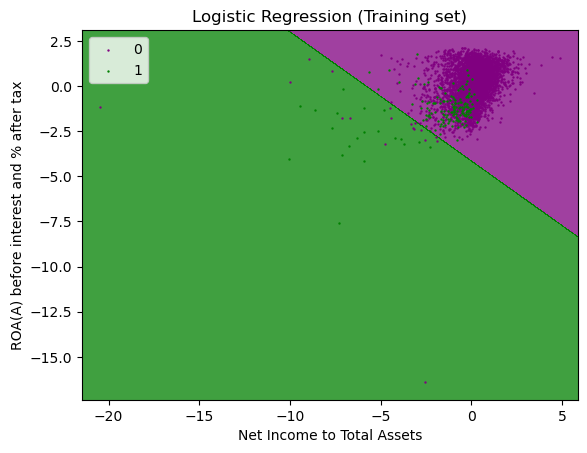

In [68]:
#Visualizing the training set result  
import numpy as nm  
import matplotlib.pyplot as mtp  
from matplotlib.colors import ListedColormap  

#Visualizing the training set result  
from matplotlib.colors import ListedColormap  
x_set, y_set = x2_train, y2_train

# create a meshgrid for all independent variables


x1, x2 = nm.meshgrid(
    nm.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01).astype(nm.float16),
    nm.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01).astype(nm.float16),
)

# create the contour plot
mtp.contourf(
    x1, x2, classifier.predict(
        nm.array([
            x1.ravel(), x2.ravel()
        ]).T
    ).reshape(x1.shape),
    alpha = 0.75, cmap = ListedColormap(('purple','green' ))
)

# set the x and y limits
mtp.xlim(x1.min(), x1.max())  
mtp.ylim(x2.min(), x2.max())  

# plot the scatter plot
for i, j in enumerate(nm.unique(y_set)):  
    mtp.scatter(
        x_set[y_set == j, 0], x_set[y_set == j, 1],  
        c = ListedColormap(('purple', 'green'))(i), label = j,
        s = 0.5
    )  

# set the title and labels for the plot
mtp.title('Logistic Regression (Training set)')  
mtp.xlabel('Net Income to Total Assets')  
mtp.ylabel('ROA(A) before interest and % after tax')  
mtp.legend()  
mtp.show() 


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


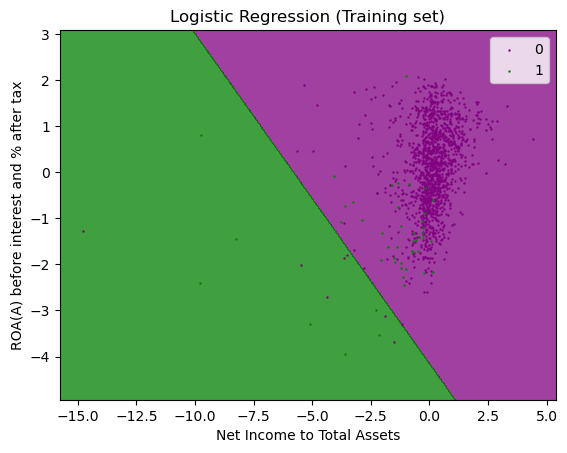

In [69]:
#Visualizing the training set result  
import numpy as nm  
import matplotlib.pyplot as mtp  
from matplotlib.colors import ListedColormap  

#Visualizing the training set result  
from matplotlib.colors import ListedColormap  
x_set, y_set = x2_test, y2_test

# create a meshgrid for all independent variables


x1, x2 = nm.meshgrid(
    nm.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01).astype(nm.float16),
    nm.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01).astype(nm.float16),
)

# create the contour plot
mtp.contourf(
    x1, x2, classifier.predict(
        nm.array([
            x1.ravel(), x2.ravel()
        ]).T
    ).reshape(x1.shape),
    alpha = 0.75, cmap = ListedColormap(('purple','green' ))
)

# set the x and y limits
mtp.xlim(x1.min(), x1.max())  
mtp.ylim(x2.min(), x2.max())  

# plot the scatter plot
for i, j in enumerate(nm.unique(y_set)):  
    mtp.scatter(
        x_set[y_set == j, 0], x_set[y_set == j, 1],  
        c = ListedColormap(('purple', 'green'))(i), label = j,s =0.5
    )  

# set the title and labels for the plot
mtp.title('Logistic Regression (Training set)')  
mtp.xlabel('Net Income to Total Assets')  
mtp.ylabel('ROA(A) before interest and % after tax')  
mtp.legend()  
mtp.show() 


The above graph shows the test set result. As we can see, the graph is divided into two regions (Purple and Green). And Green observations are in the green region, and Purple observations are in the purple region. So we can say it is a good prediction and model. Some of the green and purple data points are in different regions, which can be ignored as we have already calculated this error using the confusion matrix (46 Incorrect output).